# Sanity Checks for Saliency Maps Simple CNN MNIST Example

true: 1, pred: 1


/home/asubuntus/miniconda3/envs/sanity_checks_pytorch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


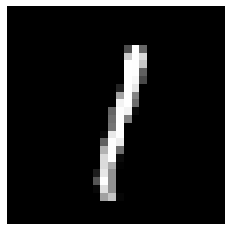

true: 5, pred: 5


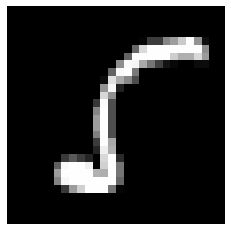

true: 0, pred: 0


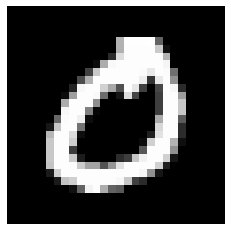

true: 5, pred: 5


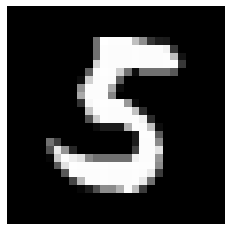

true: 5, pred: 5


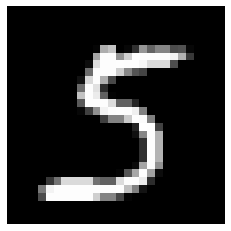

In [1]:
from torchvision import datasets, transforms
import copy
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from src import util
from captum.attr import IntegratedGradients, Saliency, InputXGradient, GuidedBackprop, DeepLift

# load pretrained model
model = torch.load('models/cnn_mnist.pt', map_location=torch.device('cpu'))
model.eval()

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

# load dataset
dataset = datasets.MNIST('data', train=False, transform=transform, download=True)
dataset_subset = torch.utils.data.Subset(dataset, np.random.choice(len(dataset), 5, replace=False))
test_loader = torch.utils.data.DataLoader(dataset_subset, batch_size=1, shuffle=False)

# print few examples
for image, label in test_loader:
    pred = model(image).argmax(axis=1)
    npimg = np.squeeze(np.squeeze(image.numpy()))
    plt.imshow(npimg, cmap='gray')
    print(f'true: {label[0]}, pred: {pred[0]}')
    plt.axis('off')
    plt.show()

In [2]:
# model architecture
model

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3136, out_features=1024, bias=True)
  (relu3): ReLU()
  (linear2): Linear(in_features=1024, out_features=10, bias=True)
)

In [3]:
# define module paths for cascading randomization
module_paths = [['linear2'], ['linear1'], ['conv2'], ['conv1']]

## Cascading Randomization: Specific Saliency Map

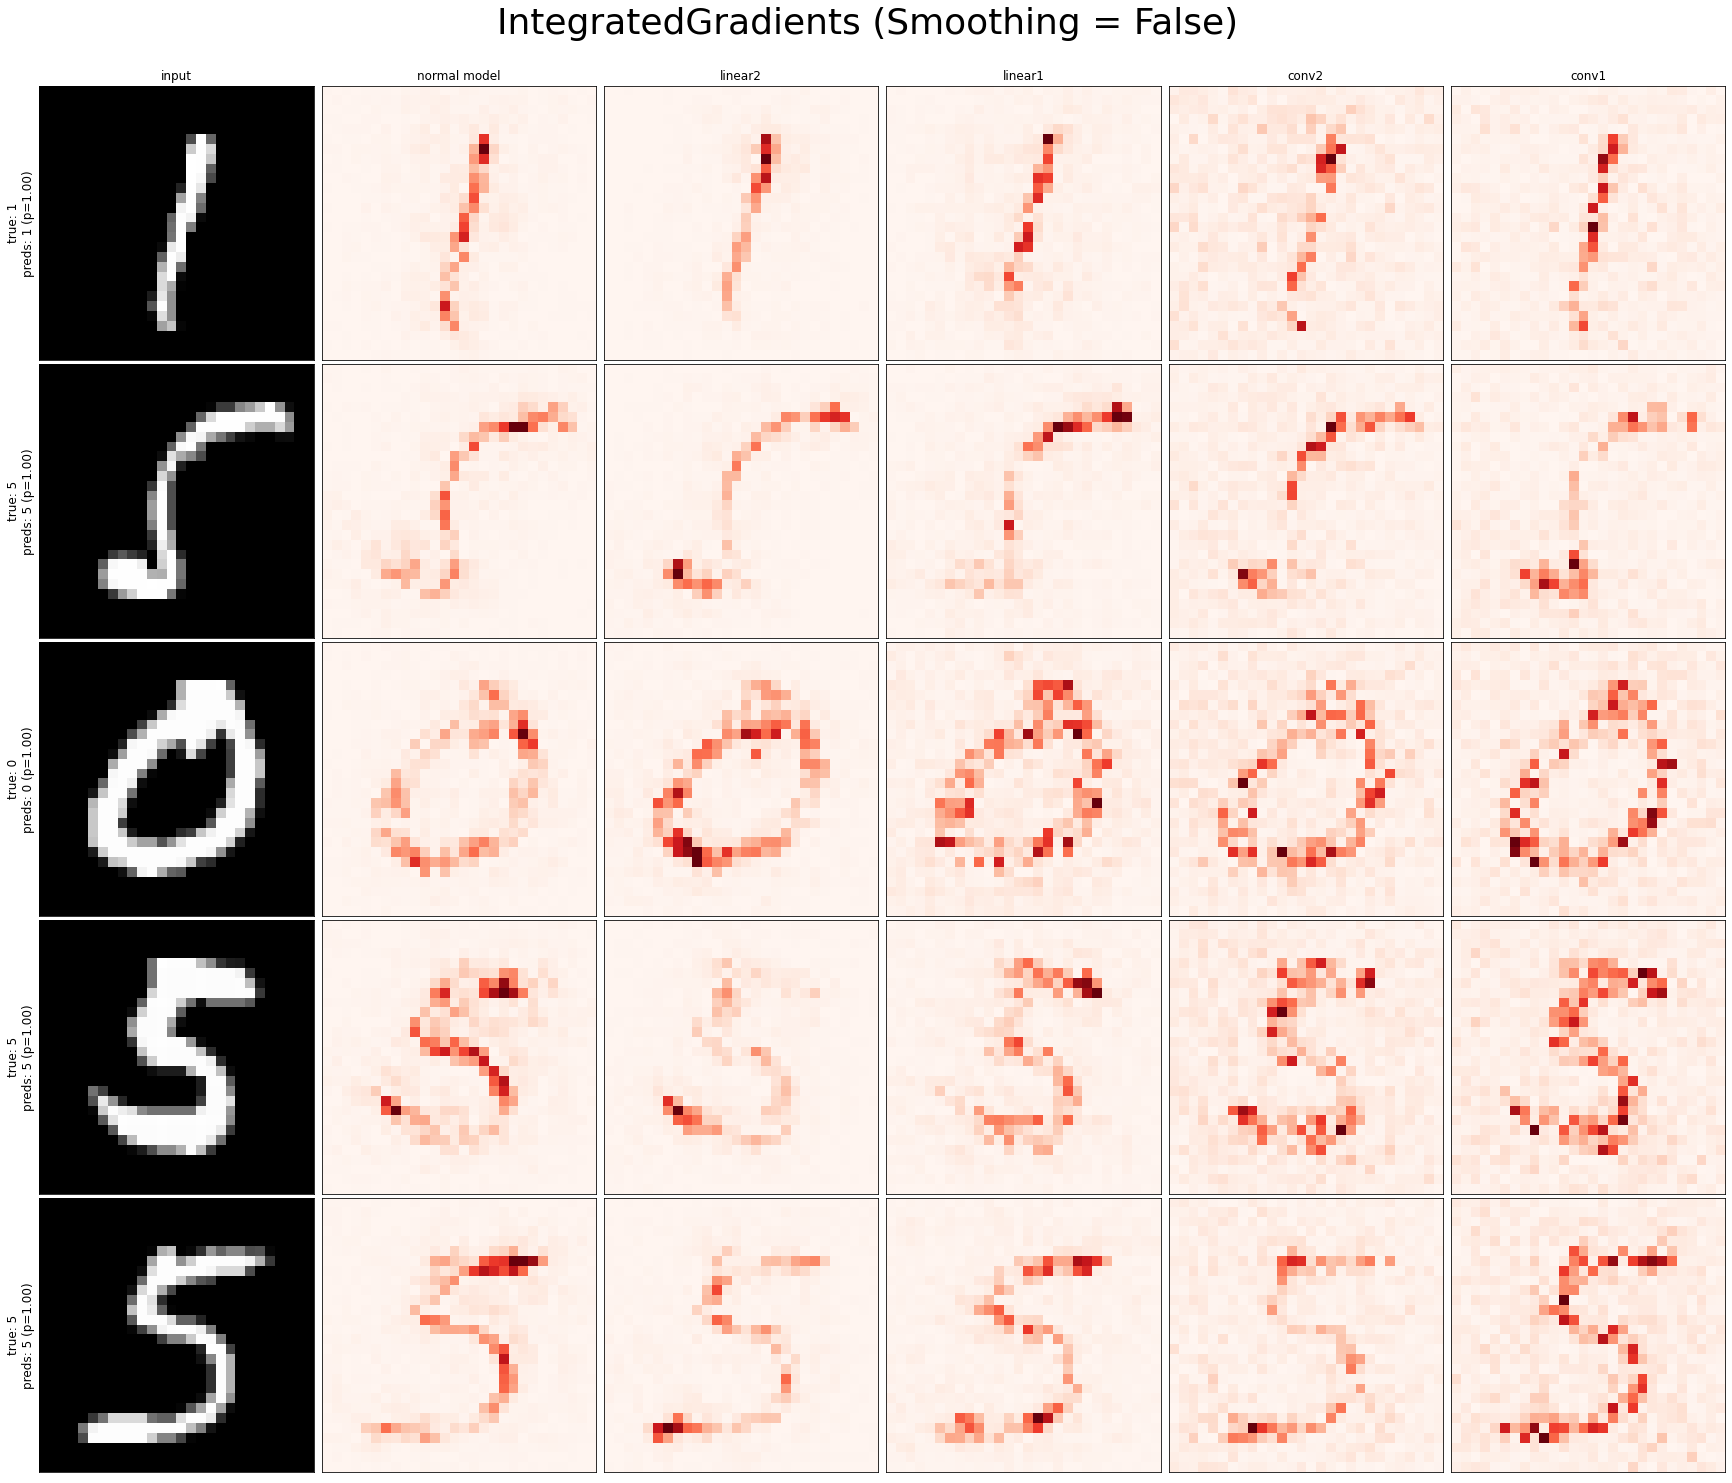

In [4]:
# visualize integrated gradients
fig, _ = util.visualize_cascading_randomization(model, module_paths, (IntegratedGradients, False), test_loader)
fig.show()

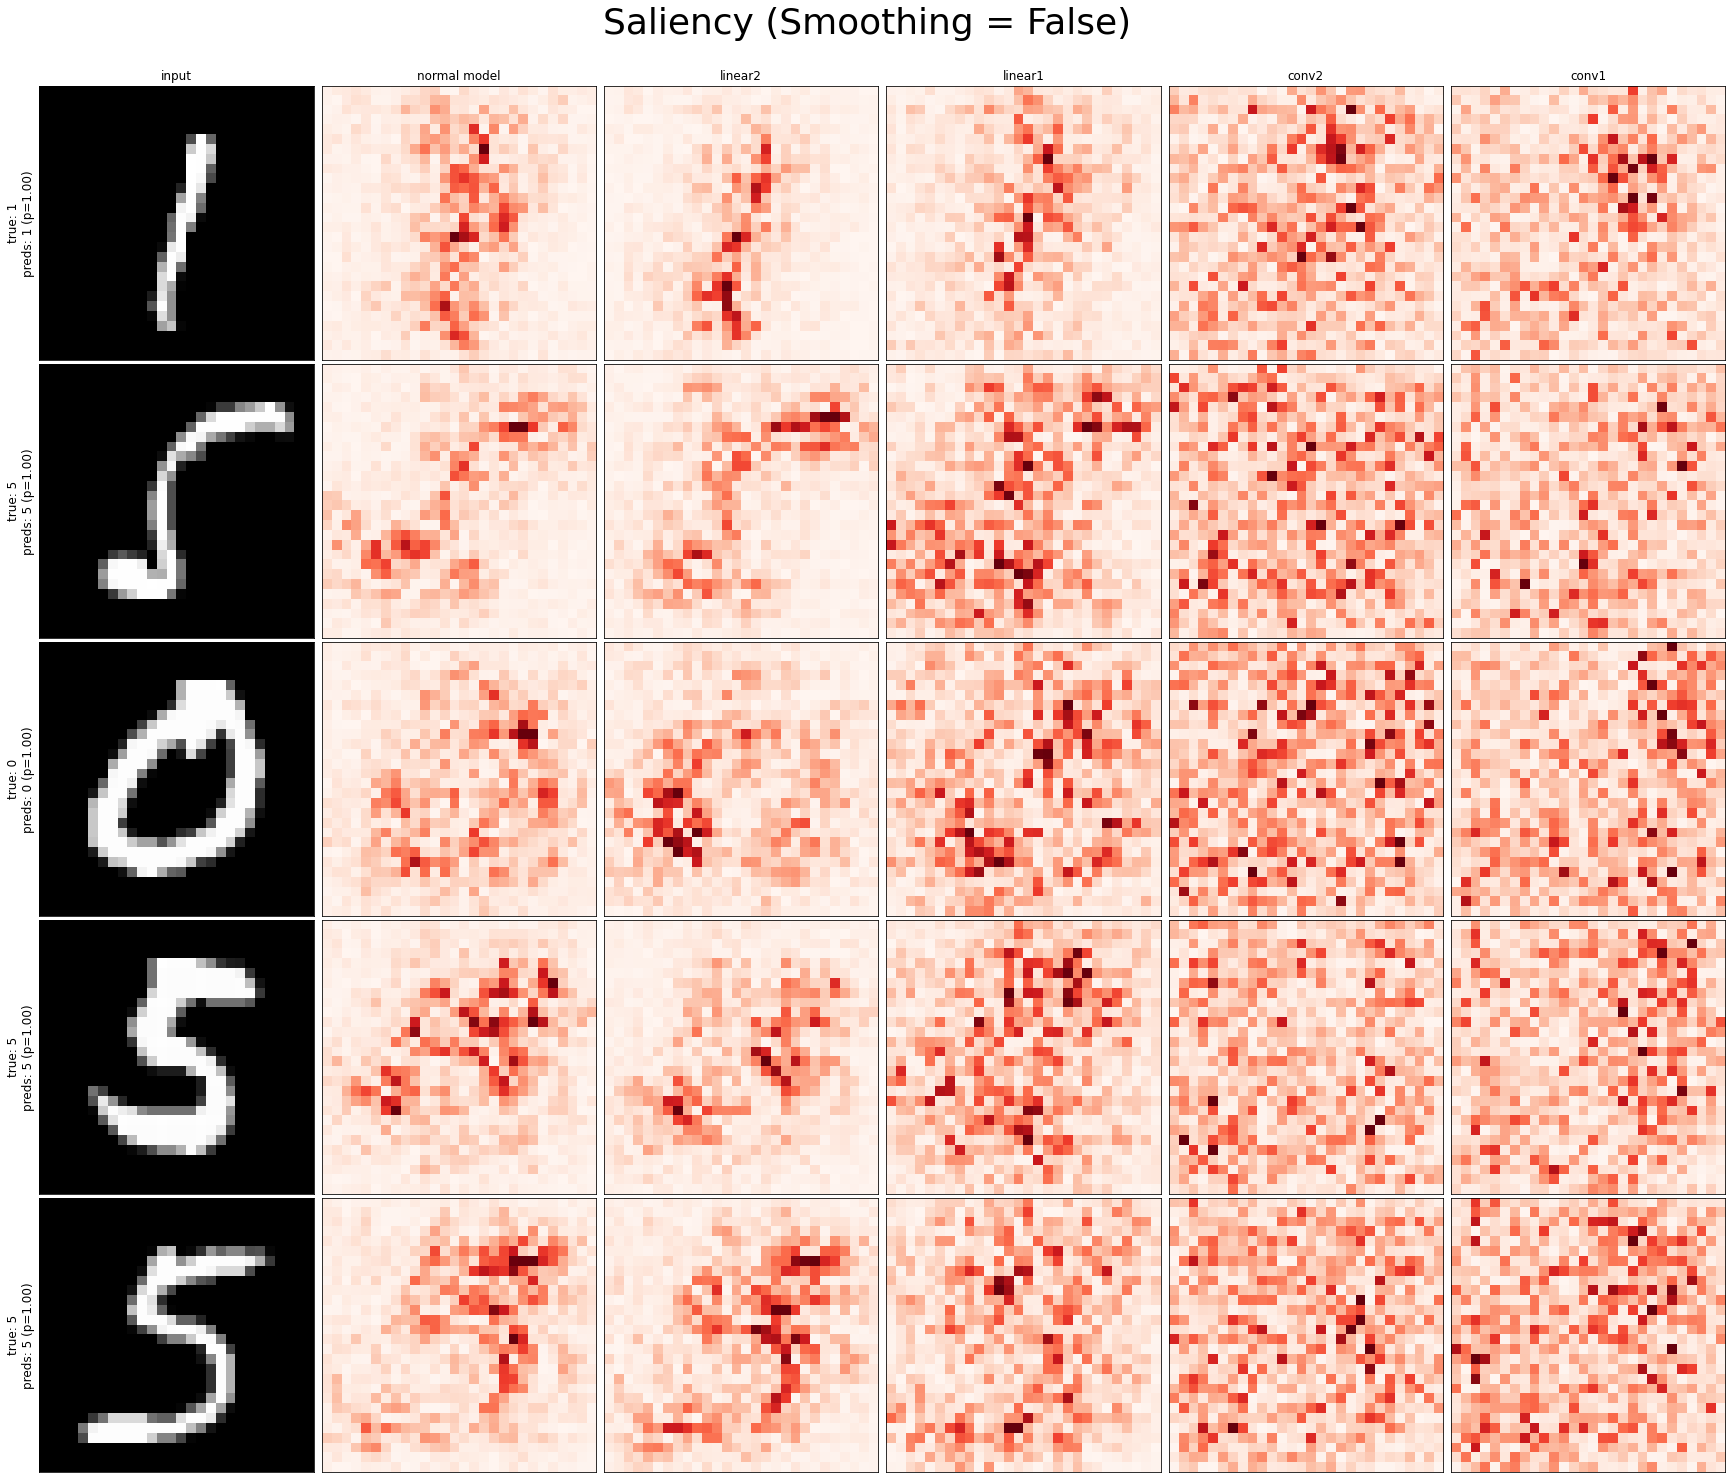

In [5]:
# visualize saliency (gradients)
fig, _ = util.visualize_cascading_randomization(model, module_paths, (Saliency, False), test_loader)
fig.show()

# Cascading Randomization: Multiple Saliency Maps

Working on Saliency
Working on Saliency
Working on InputXGradient
Working on GuidedBackprop
Working on IntegratedGradients


/home/asubuntus/miniconda3/envs/sanity_checks_pytorch/lib/python3.9/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:60: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


Working on IntegratedGradients
Working on Saliency
Working on Saliency
Working on InputXGradient
Working on GuidedBackprop
Working on IntegratedGradients
Working on IntegratedGradients
Working on Saliency
Working on Saliency
Working on InputXGradient
Working on GuidedBackprop
Working on IntegratedGradients
Working on IntegratedGradients
Working on Saliency
Working on Saliency
Working on InputXGradient
Working on GuidedBackprop
Working on IntegratedGradients
Working on IntegratedGradients
Working on Saliency
Working on Saliency
Working on InputXGradient
Working on GuidedBackprop
Working on IntegratedGradients
Working on IntegratedGradients


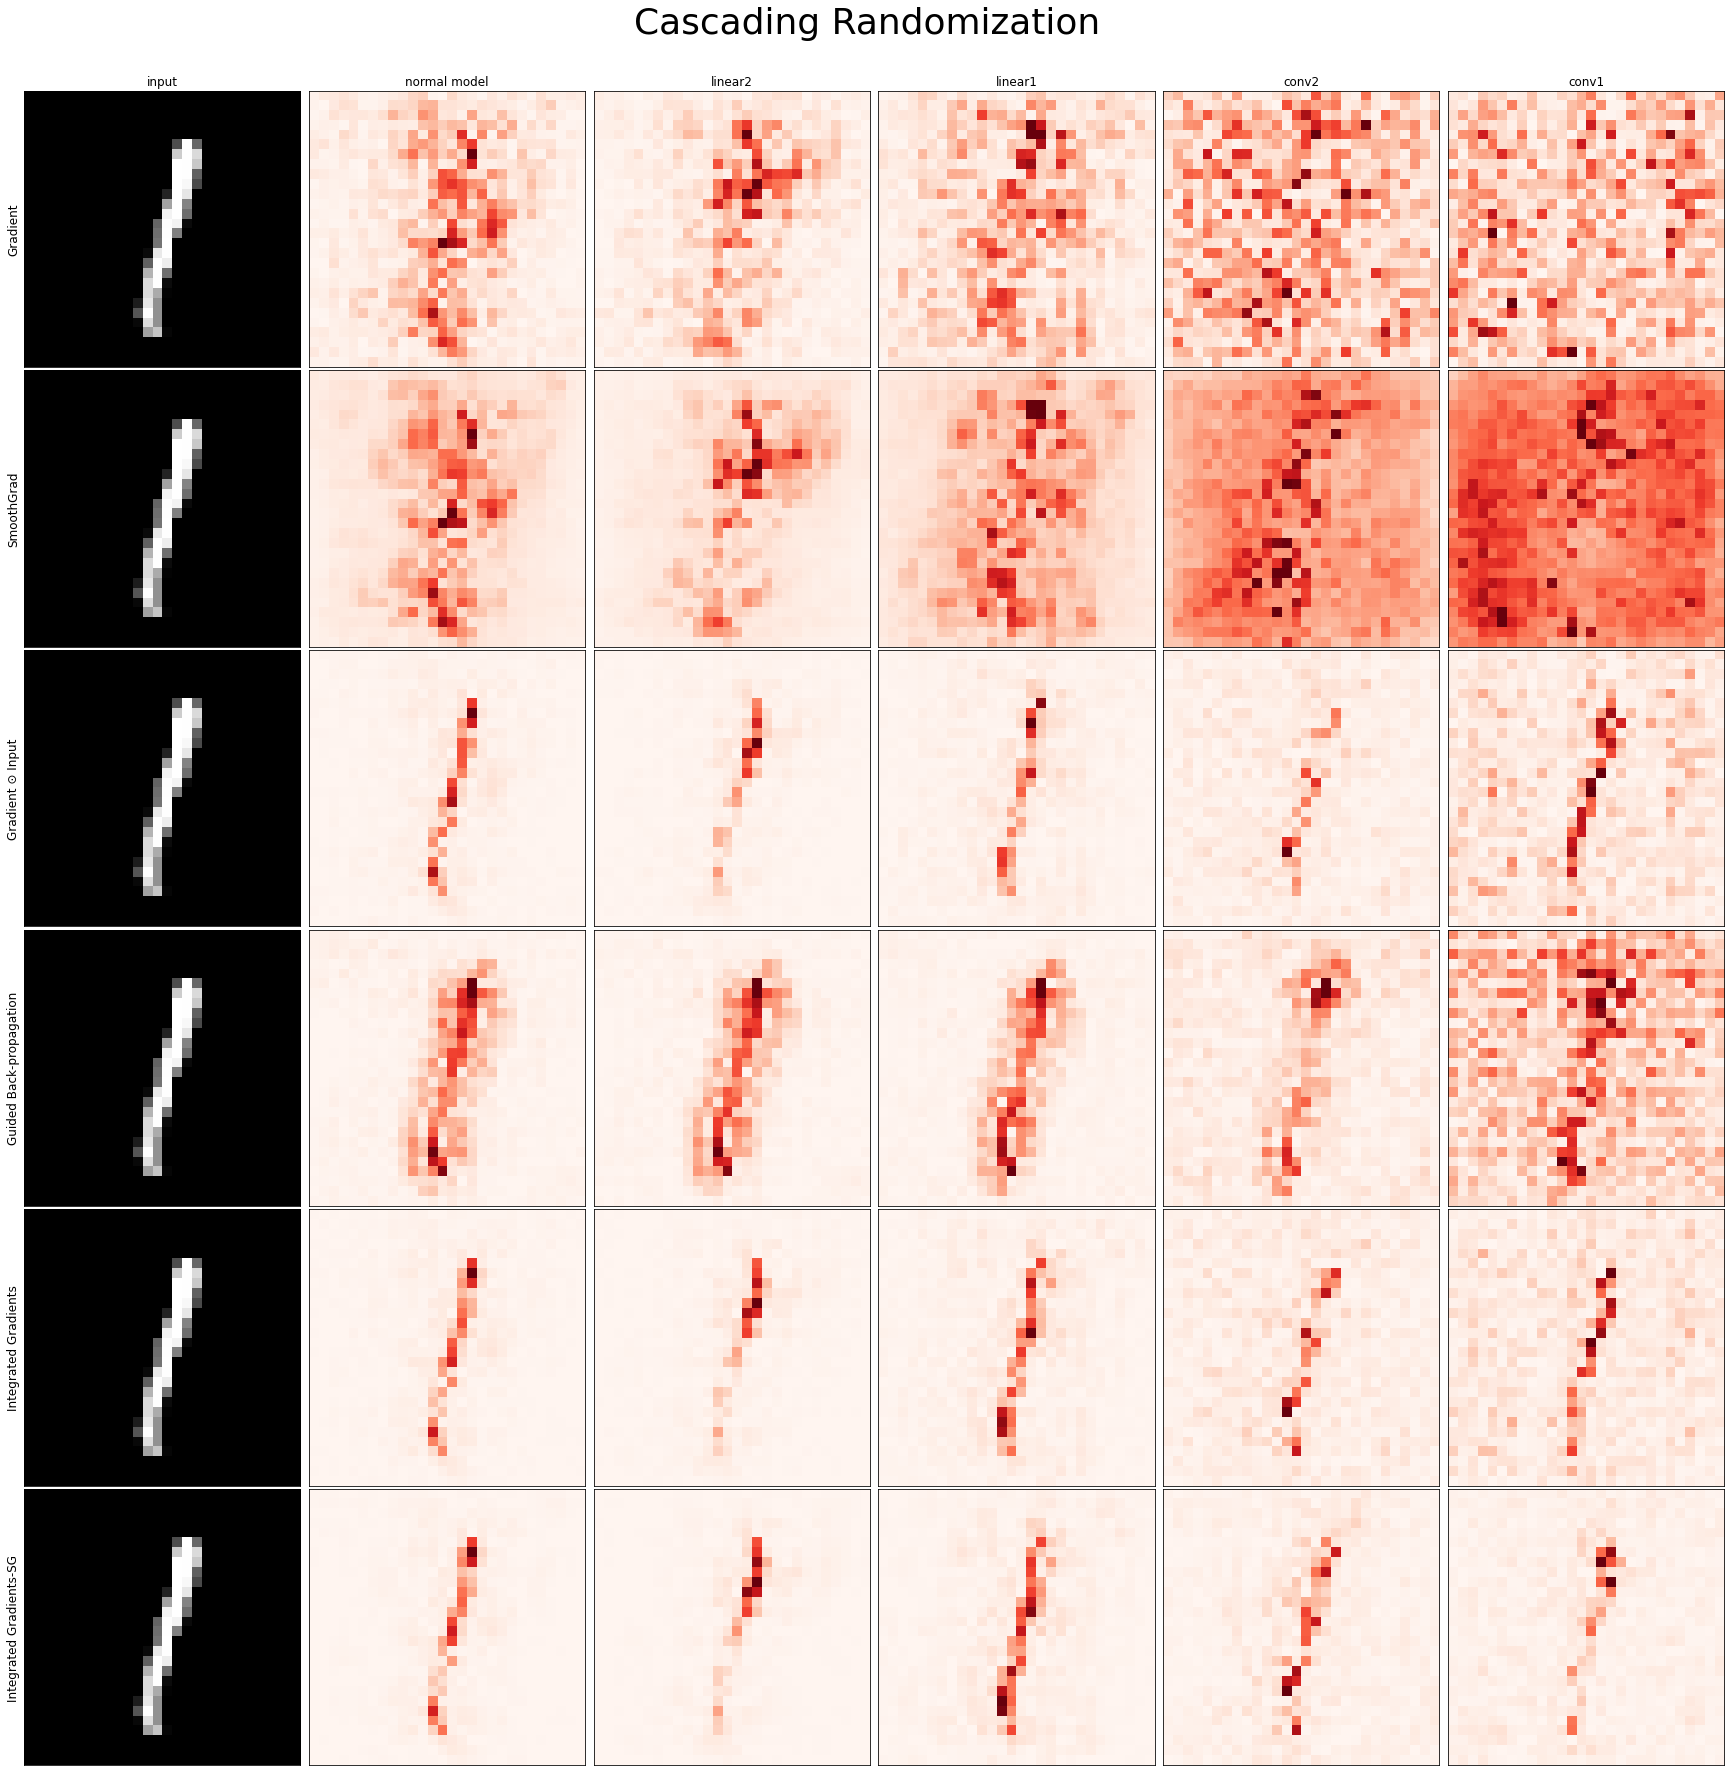

In [6]:
# multiple saliency maps for each example
for image, label in test_loader:
    fig, _ = util.visualize_cascading_randomization2(
        model,
        module_paths,
        [(Saliency, False), (Saliency, True), (InputXGradient, False), (GuidedBackprop, False), (IntegratedGradients, False), (IntegratedGradients, True)],
        ['Gradient', 'SmoothGrad', 'Gradient ⊙ Input', 'Guided Back-propagation', 'Integrated Gradients', 'Integrated Gradients-SG'],
        (image, label)
    )
    fig.show()
    break